In [41]:
#Import denpendencies
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress, pearsonr

In [42]:
file = "clean.csv"

In [43]:
data_file = pd.read_csv(file)

In [44]:
data_file.head()

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,StateParcelId,ParcelSize,ValueofHome,YearBuilt,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
0,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,C15-000-035-4368-3,10890.0,360350.0,2001.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
1,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,C16-000-107-5040-4,2328.0,228680.0,2003.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
2,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,C51-000-535-8660-8,44.0,135000.0,1980.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
3,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,C62-000-778-7949-2,NaN,87660.0,1959.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
4,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,C21-000-189-4508-9,NaN,663090.0,1991.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN


In [45]:
data1 = data_file[['PropertyCity','ValueofHome']]
data1.head(20)

,PropertyCity,ValueofHome
0,MELBOURNE,360350.0
1,MIRAMAR,228680.0
2,BRADENTON,135000.0
3,SAINT PETERSBURG,87660.0
4,NAPLES,663090.0
5,DUNEDIN,298880.0
6,DUNEDIN,141668.0
7,CLEARWATER,161169.0
8,DANIA BEACH,302070.0
9,LAUDERHILL,122040.0


In [46]:
summary = data_file.describe()
summary.loc['mean']

PropertyZip                  33404.543860
ParcelSize                   12482.103448
ValueofHome                 249102.315789
YearBuilt                     1977.039474
NumberOfStories                  1.180000
AdjSquareFeet                 1890.469298
BCEG                            67.913043
DistancetoCoast                652.271806
PoliceID                       619.494505
Crime                                 NaN
FireID                         487.179245
DistancetoFireDepartment         1.106388
DistancetoSinkhole               9.506432
SinkholeLatitude                27.554890
SinkholeLongitude              -81.683105
LocationWindSpeed              129.312775
FloodZoneRiskLevel                    NaN
Name: mean, dtype: float64

In [47]:
#Create a DataFrame of Home Values with a pool
data3 = data_file[['Pool','ValueofHome']]
data3 = data3[data3.Pool == True]
data3.head(20)

,Pool,ValueofHome
13,True,202770.0
19,True,363580.0
25,True,354430.0
29,True,311180.0
30,True,585440.0
48,True,270230.0
63,True,138127.0
104,True,366340.0
112,True,270980.0
128,True,268577.0


In [48]:
#Calculate the mean of the Home Values with a pool
mean = data3.mean()
print(mean)

Pool                1.0
ValueofHome    330447.5
dtype: float64


In [49]:
#Create a DataFrame of Home Values without a pool
data4 = data_file[['Pool','ValueofHome']]
data4 = data4[data4.Pool != True]
data4.head(20)

,Pool,ValueofHome
0,NaN,360350.0
1,NaN,228680.0
2,NaN,135000.0
3,NaN,87660.0
4,NaN,663090.0
5,NaN,298880.0
6,NaN,141668.0
7,NaN,161169.0
8,NaN,302070.0
9,NaN,122040.0


In [50]:
#Calculate the mean of Home Values without a pool
mean = data4.mean()
print(mean)

Pool                     NaN
ValueofHome    244583.138889
dtype: float64


In [51]:
#Calculate the number of homes with a pool and number of homes 
data_file['Pool'].value_counts(dropna = False)

NaN     216
True     12
Name: Pool, dtype: int64

In [52]:
#Calculate the avg cost of having a pool per square foot
data_file['Costpersqfoot'] = data_file['ValueofHome']/data_file['AdjSquareFeet']


In [54]:
groupby_pool = data_file['Costpersqfoot'].groupby(data_file['Pool'])
groupby_pool

In [57]:
len(list(data_file['Costpersqfoot'].groupby(data_file['Pool'])))

1

In [58]:
list(data_file['Costpersqfoot'].groupby(data_file['Pool']))

[(True,
  13     116.134021
  19     195.894397
  25     155.724956
  29     113.569343
  30     175.966336
  48     126.868545
  63      79.246701
  104    152.641667
  112    143.224101
  128    150.126887
  152    220.069677
  220    109.862219
  Name: Costpersqfoot, dtype: float64)]

In [63]:
data_file.groupby(['Pool']).agg(
        {'Costpersqfoot': ['sum', 'max', 'mean', lambda x: x.max() - x.min()]}
)

Costpersqfoot                                    
               sum         max        mean  <lambda_0>
Pool                                                  
True   1739.328849  220.069677  144.944071  140.822976

In [68]:
data_file = data_file.fillna(False)

In [69]:
data_file.groupby(['Pool']).agg(
        {'Costpersqfoot': ['sum', 'max', 'mean', lambda x: x.max() - x.min()]}
)

Costpersqfoot                                     
                sum          max        mean  <lambda_0>
Pool                                                    
False  29344.333829  1001.585897  135.853397  978.072384
True    1739.328849   220.069677  144.944071  140.822976

##### Looking at the distribuation of the dataset in terms of NumberOfStories
data_file['NumberOfStories'].value_counts(dropna = False)

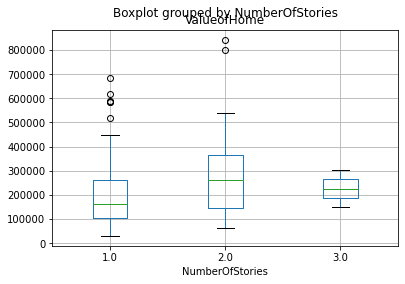

In [14]:
# Boxplot of Number of Stories in the home vs the value of home
data_file.boxplot(column = 'ValueofHome', by = 'NumberOfStories');

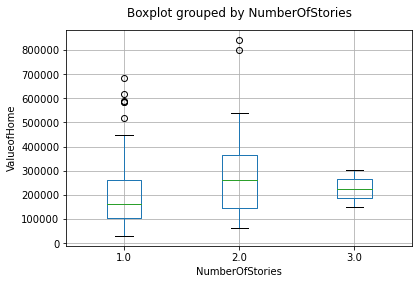

In [15]:
# Same plot but without the Home values and NumberofStories
data_file.boxplot(column = 'ValueofHome', by = 'NumberOfStories');
plt.title('');
plt.ylabel('ValueofHome')
plt.xlabel('NumberOfStories');